# handwritten classification Using KNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data 

In [2]:
df =pd.read_csv('./Datasets/train.csv')

In [3]:
data=df.values

In [4]:
data.shape

(42000, 785)

In [5]:
X=data[:,1:]
Y=data[:,0]
X.shape

(42000, 784)

### Spliting of data

In [6]:
split=int(0.8*X.shape[0])
split

33600

In [7]:
X_train=X[:split,:]
Y_train=Y[:split]
X_test=X[split:,:]
Y_test=Y[split:]

In [8]:
X_train.shape
Y_train.shape

(33600,)

### Data visualization

In [9]:
def drawImg(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')

1


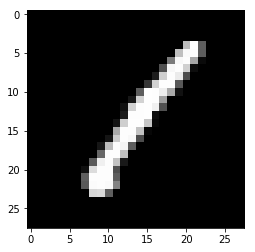

0


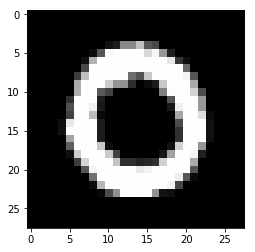

1


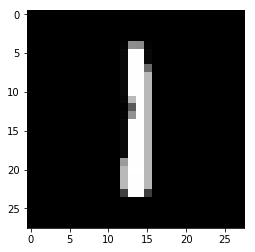

4


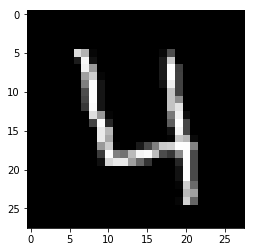

0


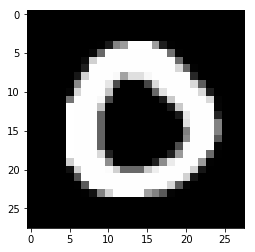

In [10]:
for i in range(5):
    drawImg(X_train[i])
    print(Y_train[i])
    plt.show()

# Euclidean distance

In [11]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

### Knn algortihm
- Here we take majority votes

In [12]:
def knn(X,Y,query_point,K=5):
    vals=[]
    m=X.shape[0]
    for i in range(m):
        d=dist(query_point,X[i])
        vals.append((d,Y[i]))
    vals=sorted(vals)
    vals=vals[:K]
    vals=np.array(vals)
    #print(vals)
    new_vals=np.unique(vals[:,1],return_counts=True)
    #print(new_vals)
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    return int(pred)

### Prediction

In [13]:
x=knn(X_train,Y_train,X_test[76])
print(x)

9


### Test label And Image

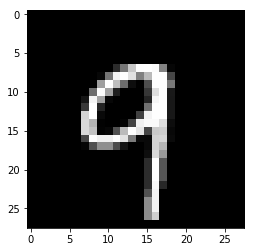

In [14]:
drawImg(X_test[76])

In [15]:
Y_test[76]

9

# Accuracy

In [18]:
cnt = 0
for i in range(100):
    pred = knn(X_train,Y_train,X_test[i])
    if(pred==Y_test[i]):
        cnt +=1
        
print(cnt/100)

0.96
